In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, Ridge ,Lasso, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error

from tqdm.notebook import *

In [2]:
# dictionary with list object in values
details = {
    'show_id' : [np.nan, 's2', 's3', 's4',np.nan , 's6', 's7', 's8', 's9'],
    'type' : ['TV Show', np.nan, 'Movie', 'TV Show', 'Movie','TV Show', 'Movie', 'Movie', 'TV Show'],
    'title' : ['rent', 'zero', 'marche', 'ecole', 'defense', np.nan, 'zero', 'rent', 'vie'],
    'director' : ['Abdou', 'Grau', 'Chan', 'Acker','Luketic', 'Laron', 'Acker','Marcel', 'Labrador'],     
    'country' : ['Brazil', 'Mexico', None, 'US', 'Cam','UK','UK','UK','UK'], 
     'manque' : [139, np.nan, np.nan, np.nan, np.nan, np.nan,np.nan, np.nan, np.nan],
    'added' : [12.8, 17.8, 1007, 32, 1720.4, 4587, 1001.4,28.45, 37845.9],     
    'release_year' : [2020, 2016, 2011, 2009,2008, 2010, 2017, 2009, 2022],    
    'rating' : ['TV-MA', 'TV-MA', 'R', 'PG-13', 'PG-13', 'PG-19',np.nan, 'TV-MO', 'S'],   
    'duration' : [90.5, 93, 78, 80,123, 75.33, 115, 86, 125],    
    'averageRating' : [5.7, np.nan, 10.5, 6.2, 6.2, np.nan, 10, 3.5, 9],
    'is_action' : [True, True, False, True, False, False,True, False, False],
    'duree' : [139, 90, np.nan, 155, 133, np.nan,165, 120, 159],
    'Nb_entree' : [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,165, np.nan, np.nan],
    'numVotes' : [1670, 208, np.nan, 123, np.nan, 817, 163, 33204, 1266]
}

In [3]:
# creating a Dataframe object 
df = pd.DataFrame(details)

In [4]:
df 

,show_id,type,title,director,country,manque,added,release_year,rating,duration,averageRating,is_action,duree,Nb_entree,numVotes
0,NaN,TV Show,rent,Abdou,Brazil,139.0,12.80,2020,TV-MA,90.50,5.7,True,139.0,NaN,1670.0
1,s2,NaN,zero,Grau,Mexico,NaN,17.80,2016,TV-MA,93.00,NaN,True,90.0,NaN,208.0
2,s3,Movie,marche,Chan,None,NaN,1007.00,2011,R,78.00,10.5,False,NaN,NaN,NaN
3,s4,TV Show,ecole,Acker,US,NaN,32.00,2009,PG-13,80.00,6.2,True,155.0,NaN,123.0
4,NaN,Movie,defense,Luketic,Cam,NaN,1720.40,2008,PG-13,123.00,6.2,False,133.0,NaN,NaN
5,s6,TV Show,NaN,Laron,UK,NaN,4587.00,2010,PG-19,75.33,NaN,False,NaN,NaN,817.0
6,s7,Movie,zero,Acker,UK,NaN,1001.40,2017,NaN,115.00,10.0,True,165.0,165.0,163.0
7,s8,Movie,rent,Marcel,UK,NaN,28.45,2009,TV-MO,86.00,3.5,False,120.0,NaN,33204.0
8,s9,TV Show,vie,Labrador,UK,NaN,37845.90,2022,S,125.00,9.0,False,159.0,NaN,1266.0


In [5]:
df.rating

0    TV-MA
1    TV-MA
2        R
3    PG-13
4    PG-13
5    PG-19
6      NaN
7    TV-MO
8        S
Name: rating, dtype: object

In [6]:
df.rating.value_counts()

rating
TV-MA    2
PG-13    2
R        1
PG-19    1
TV-MO    1
S        1
Name: count, dtype: int64

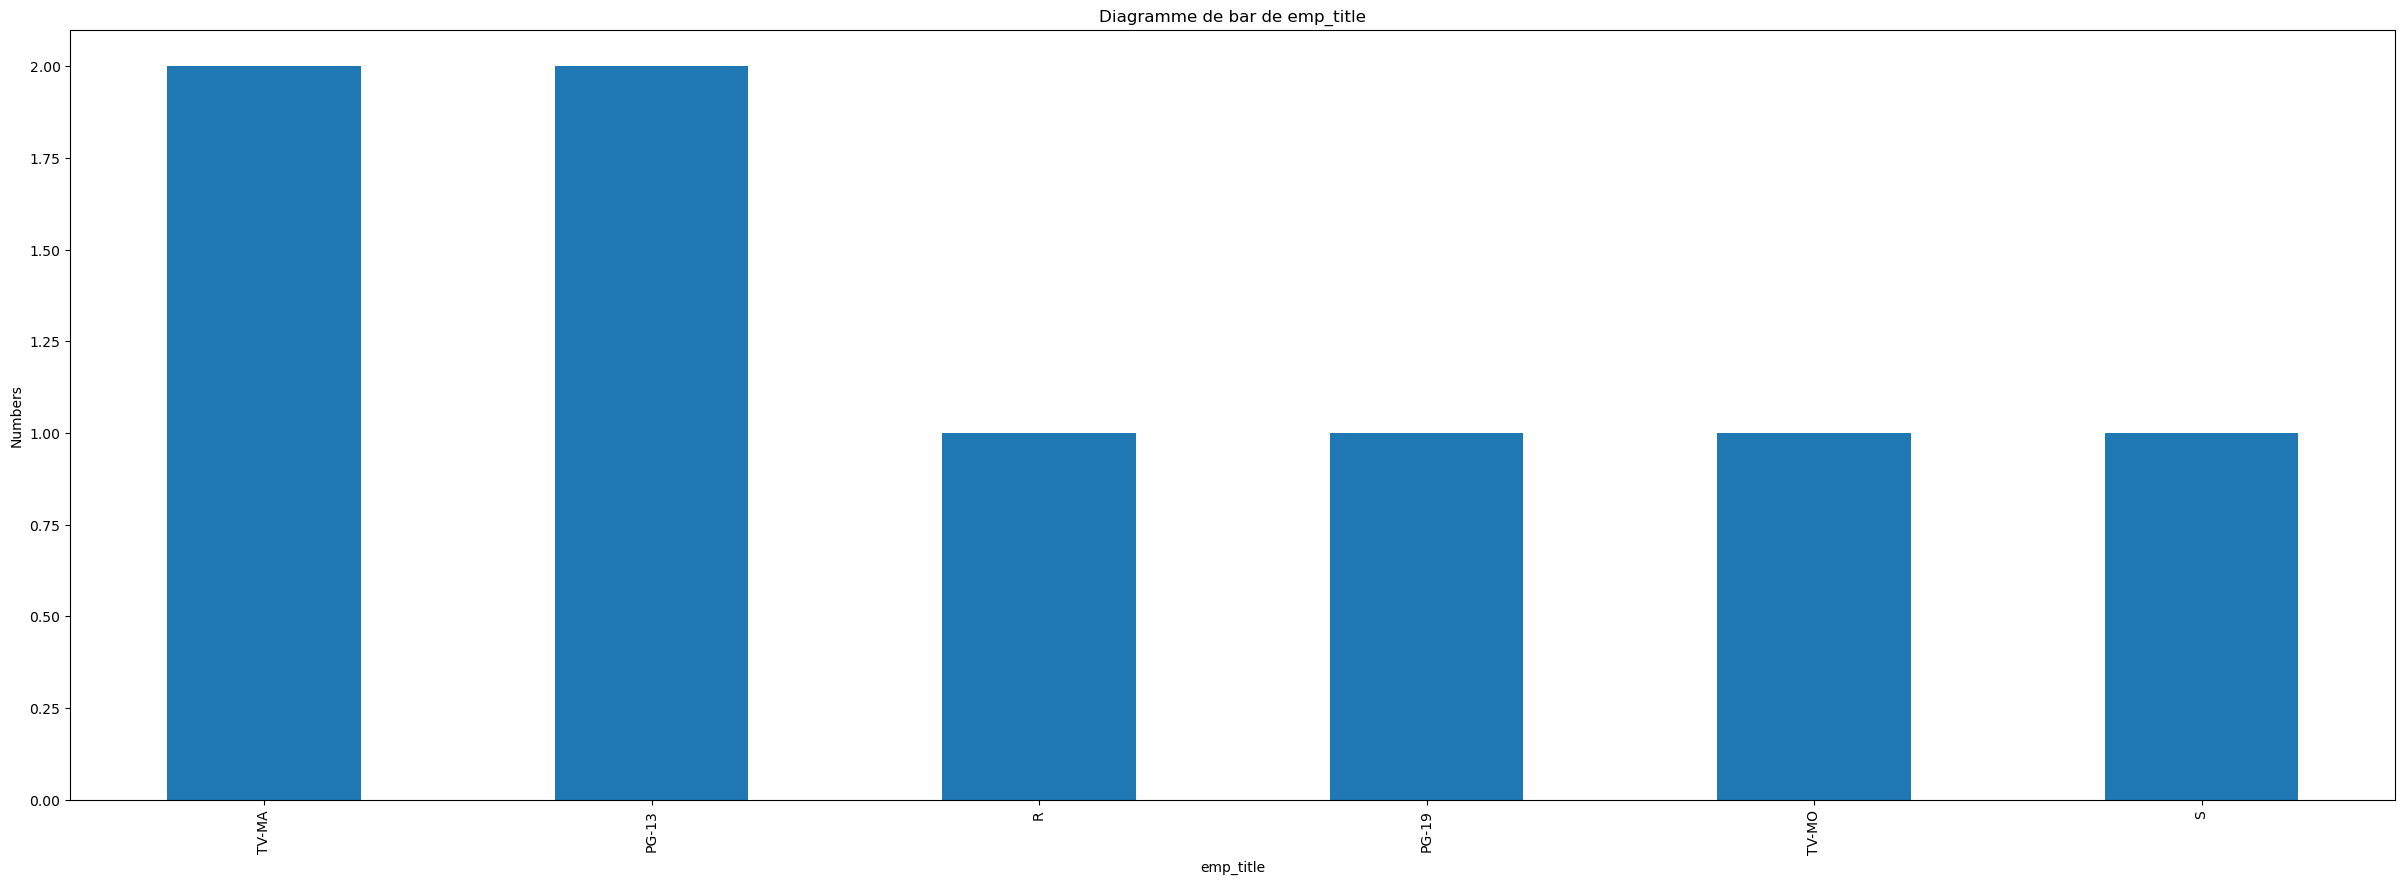

In [7]:
import matplotlib.pyplot as plt
#df['emp_title'].value_counts()(normalize=True).plot(kind='bar')
plt.figure(figsize = (30,10))
df['rating'].value_counts().plot(kind='bar')
plt.title('Diagramme de bar de emp_title')
plt.xlabel('emp_title')
plt.ylabel('Numbers')
plt.show()
#plt.show()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        7 non-null      object 
 1   type           8 non-null      object 
 2   title          8 non-null      object 
 3   director       9 non-null      object 
 4   country        8 non-null      object 
 5   manque         1 non-null      float64
 6   added          9 non-null      float64
 7   release_year   9 non-null      int64  
 8   rating         8 non-null      object 
 9   duration       9 non-null      float64
 10  averageRating  7 non-null      float64
 11  is_action      9 non-null      bool   
 12  duree          7 non-null      float64
 13  Nb_entree      1 non-null      float64
 14  numVotes       7 non-null      float64
dtypes: bool(1), float64(7), int64(1), object(6)
memory usage: 1.1+ KB


In [9]:
#plt.scatter(df.added, df.rating)
#plt.show()

In [10]:
df['show_id']= np.where(df['show_id'].isna(), 0, 1)

In [11]:
df

,show_id,type,title,director,country,manque,added,release_year,rating,duration,averageRating,is_action,duree,Nb_entree,numVotes
0,0,TV Show,rent,Abdou,Brazil,139.0,12.80,2020,TV-MA,90.50,5.7,True,139.0,NaN,1670.0
1,1,NaN,zero,Grau,Mexico,NaN,17.80,2016,TV-MA,93.00,NaN,True,90.0,NaN,208.0
2,1,Movie,marche,Chan,None,NaN,1007.00,2011,R,78.00,10.5,False,NaN,NaN,NaN
3,1,TV Show,ecole,Acker,US,NaN,32.00,2009,PG-13,80.00,6.2,True,155.0,NaN,123.0
4,0,Movie,defense,Luketic,Cam,NaN,1720.40,2008,PG-13,123.00,6.2,False,133.0,NaN,NaN
5,1,TV Show,NaN,Laron,UK,NaN,4587.00,2010,PG-19,75.33,NaN,False,NaN,NaN,817.0
6,1,Movie,zero,Acker,UK,NaN,1001.40,2017,NaN,115.00,10.0,True,165.0,165.0,163.0
7,1,Movie,rent,Marcel,UK,NaN,28.45,2009,TV-MO,86.00,3.5,False,120.0,NaN,33204.0
8,1,TV Show,vie,Labrador,UK,NaN,37845.90,2022,S,125.00,9.0,False,159.0,NaN,1266.0


C:\Users\thfam\anaconda3\envs\Projet_accidents_routiers\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


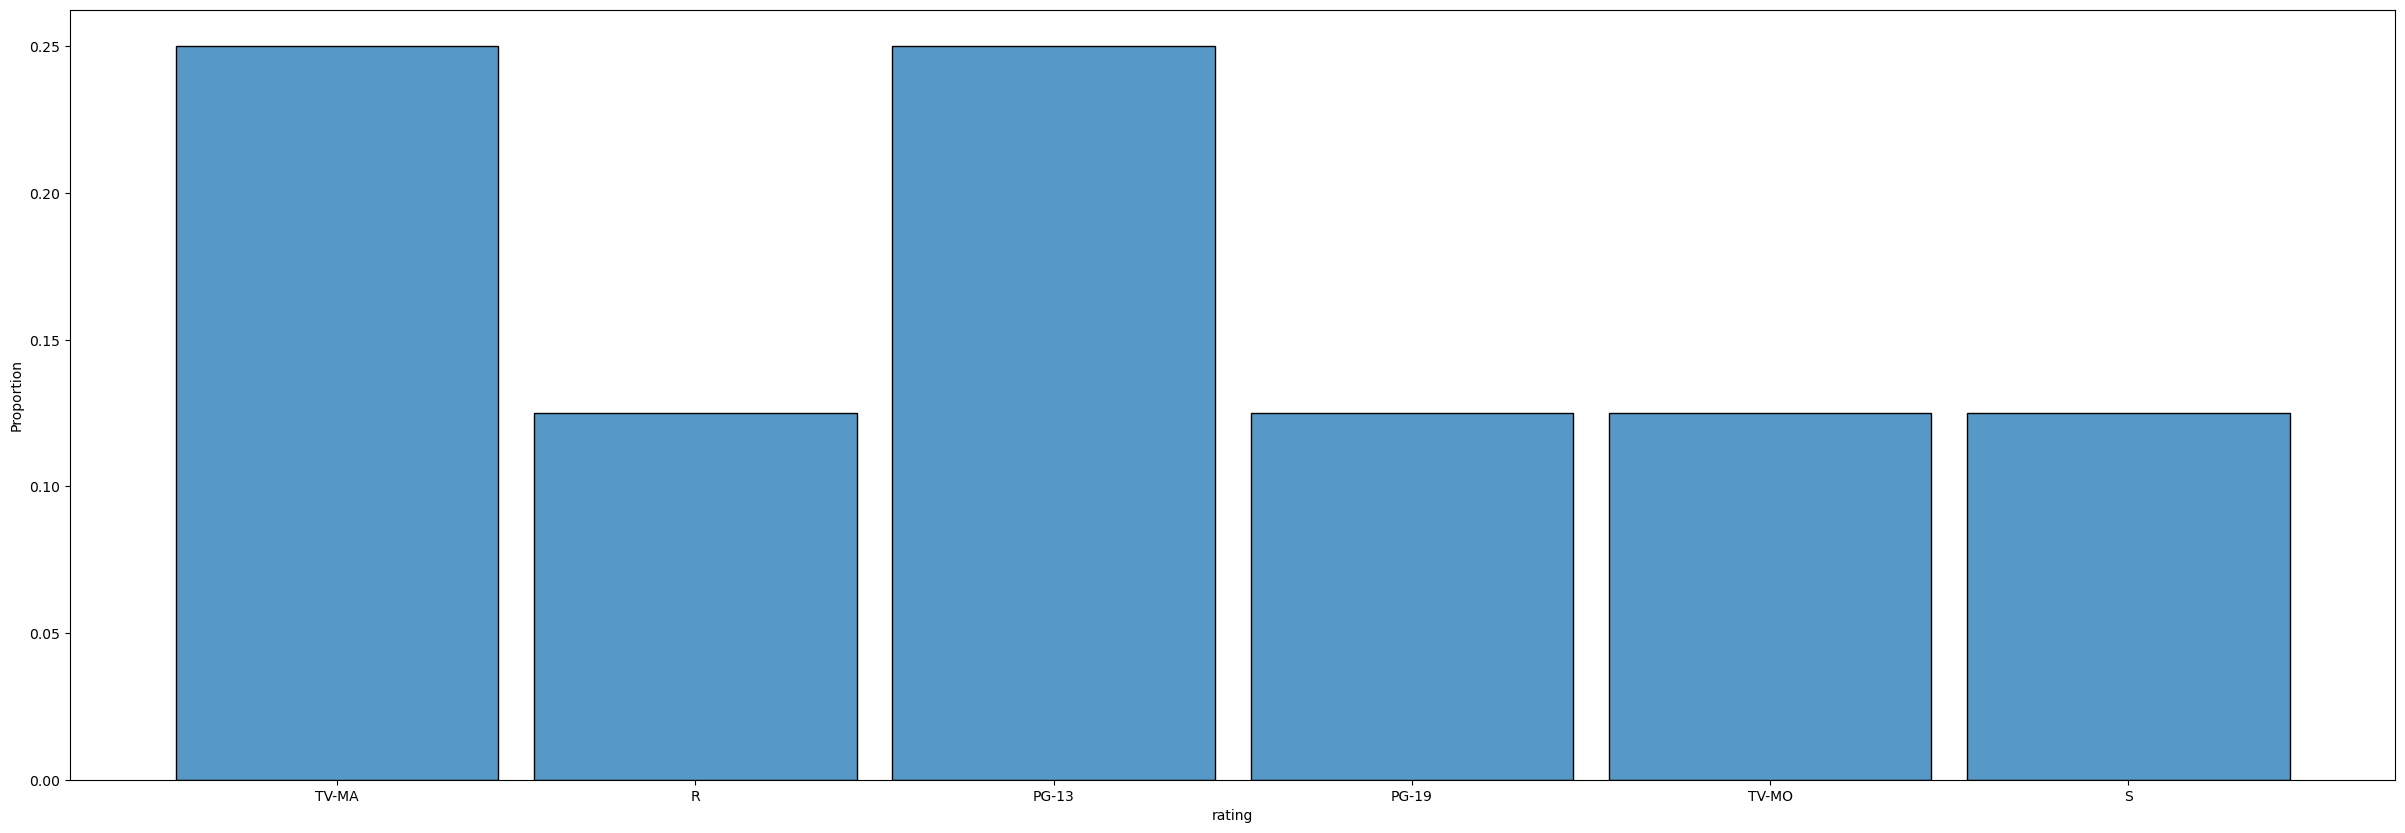

In [12]:
#visualiser Motif du déplacement au moment de l’accident
import seaborn as sns
#sns.countplot(x = "rating", data= df, stat = "percent")
#plt.show()

plt.figure(figsize = (30,10))
sns.histplot(x = df["rating"], stat = 'proportion', shrink = 0.9)
plt.show()

In [13]:
# dictionary with list object in values
details_1 = {
    'show_id' : [np.nan, 's2', 's3', 's4',np.nan , 's6', 's7', 's8', 's9'],
    'type' : ['TV Show', np.nan, 'Movie', 'TV Show', 'Movie','TV Show', 'Movie', 'Movie', 'TV Show'],
    'title' : ['rent', 'zero', 'marche', 'ecole', 'defense', np.nan, 'zero', 'rent', 'vie'],
    'director' : ['Abdou', 'Grau', 'Chan', 'Acker','Luketic', 'Laron', 'Acker','Marcel', 'Labrador'],
    
    'loan_status' : ['Current', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)','Fully Paid', 'Default', 'Charged Off','Current', 'Late (16-30 days)'],
    'grade' : ['A', 'B', 'C', 'D','E', 'F', 'G','A', 'E'],
    'term' : ['36 months', '60 months', '36 months', '36 months','60 months', '60 months', '36 months','36 months', '60 months'],
    
    'country' : ['Brazil', 'Mexico', None, 'US', 'Cam','UK','UK','UK','UK'], 
     'manque' : [139, np.nan, np.nan, np.nan, np.nan, np.nan,np.nan, np.nan, np.nan],
    'added' : [12.8, 17.8, 1007, 32, 1720.4, 4587, 1001.4,28.45, 37845.9],     
    'release_year' : [2020, 2016, 2011, 2009,2008, 2010, 2017, 2009, 2022],    
    'rating' : ['TV-MA', 'TV-MA', 'R', 'PG-13', 'PG-13', 'PG-19',np.nan, 'TV-MO', 'S'],   
    'duration' : [90.5, 93, 78, 80,123, 75.33, 115, 86, 125],    
    'averageRating' : [5.7, np.nan, 10.5, 6.2, 6.2, np.nan, 10, 3.5, 9],
    'is_action' : [True, True, False, True, False, False,True, False, False],
    'duree' : [139, 90, np.nan, 155, 133, np.nan,165, 120, 159],
    'Nb_entree' : [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,165, np.nan, np.nan],
    'numVotes' : [1670, 208, np.nan, 123, np.nan, 817, 163, 33204, 1266]
}

In [14]:
# creating a Dataframe object 
df1 = pd.DataFrame(details_1)

In [15]:
df1

,show_id,type,title,director,loan_status,grade,term,country,manque,added,release_year,rating,duration,averageRating,is_action,duree,Nb_entree,numVotes
0,NaN,TV Show,rent,Abdou,Current,A,36 months,Brazil,139.0,12.80,2020,TV-MA,90.50,5.7,True,139.0,NaN,1670.0
1,s2,NaN,zero,Grau,In Grace Period,B,60 months,Mexico,NaN,17.80,2016,TV-MA,93.00,NaN,True,90.0,NaN,208.0
2,s3,Movie,marche,Chan,Late (16-30 days),C,36 months,None,NaN,1007.00,2011,R,78.00,10.5,False,NaN,NaN,NaN
3,s4,TV Show,ecole,Acker,Late (31-120 days),D,36 months,US,NaN,32.00,2009,PG-13,80.00,6.2,True,155.0,NaN,123.0
4,NaN,Movie,defense,Luketic,Fully Paid,E,60 months,Cam,NaN,1720.40,2008,PG-13,123.00,6.2,False,133.0,NaN,NaN
5,s6,TV Show,NaN,Laron,Default,F,60 months,UK,NaN,4587.00,2010,PG-19,75.33,NaN,False,NaN,NaN,817.0
6,s7,Movie,zero,Acker,Charged Off,G,36 months,UK,NaN,1001.40,2017,NaN,115.00,10.0,True,165.0,165.0,163.0
7,s8,Movie,rent,Marcel,Current,A,36 months,UK,NaN,28.45,2009,TV-MO,86.00,3.5,False,120.0,NaN,33204.0
8,s9,TV Show,vie,Labrador,Late (16-30 days),E,60 months,UK,NaN,37845.90,2022,S,125.00,9.0,False,159.0,NaN,1266.0


In [16]:
df1.replace({'loan_status':{'Current':"A", 'In Grace Period':"A", 'Fully Paid':"A", 
                            'Late (31-120 days)':"B", 'Default':"B", 'Charged Off':"B", 
                            'Late (16-30 days)':"C"}}, inplace = True)

In [17]:
df1

,show_id,type,title,director,loan_status,grade,term,country,manque,added,release_year,rating,duration,averageRating,is_action,duree,Nb_entree,numVotes
0,NaN,TV Show,rent,Abdou,A,A,36 months,Brazil,139.0,12.80,2020,TV-MA,90.50,5.7,True,139.0,NaN,1670.0
1,s2,NaN,zero,Grau,A,B,60 months,Mexico,NaN,17.80,2016,TV-MA,93.00,NaN,True,90.0,NaN,208.0
2,s3,Movie,marche,Chan,C,C,36 months,None,NaN,1007.00,2011,R,78.00,10.5,False,NaN,NaN,NaN
3,s4,TV Show,ecole,Acker,B,D,36 months,US,NaN,32.00,2009,PG-13,80.00,6.2,True,155.0,NaN,123.0
4,NaN,Movie,defense,Luketic,A,E,60 months,Cam,NaN,1720.40,2008,PG-13,123.00,6.2,False,133.0,NaN,NaN
5,s6,TV Show,NaN,Laron,B,F,60 months,UK,NaN,4587.00,2010,PG-19,75.33,NaN,False,NaN,NaN,817.0
6,s7,Movie,zero,Acker,B,G,36 months,UK,NaN,1001.40,2017,NaN,115.00,10.0,True,165.0,165.0,163.0
7,s8,Movie,rent,Marcel,A,A,36 months,UK,NaN,28.45,2009,TV-MO,86.00,3.5,False,120.0,NaN,33204.0
8,s9,TV Show,vie,Labrador,C,E,60 months,UK,NaN,37845.90,2022,S,125.00,9.0,False,159.0,NaN,1266.0


In [18]:
df1 = df1.loc[df1["loan_status"] != "C"]

In [19]:
df1

,show_id,type,title,director,loan_status,grade,term,country,manque,added,release_year,rating,duration,averageRating,is_action,duree,Nb_entree,numVotes
0,NaN,TV Show,rent,Abdou,A,A,36 months,Brazil,139.0,12.80,2020,TV-MA,90.50,5.7,True,139.0,NaN,1670.0
1,s2,NaN,zero,Grau,A,B,60 months,Mexico,NaN,17.80,2016,TV-MA,93.00,NaN,True,90.0,NaN,208.0
3,s4,TV Show,ecole,Acker,B,D,36 months,US,NaN,32.00,2009,PG-13,80.00,6.2,True,155.0,NaN,123.0
4,NaN,Movie,defense,Luketic,A,E,60 months,Cam,NaN,1720.40,2008,PG-13,123.00,6.2,False,133.0,NaN,NaN
5,s6,TV Show,NaN,Laron,B,F,60 months,UK,NaN,4587.00,2010,PG-19,75.33,NaN,False,NaN,NaN,817.0
6,s7,Movie,zero,Acker,B,G,36 months,UK,NaN,1001.40,2017,NaN,115.00,10.0,True,165.0,165.0,163.0
7,s8,Movie,rent,Marcel,A,A,36 months,UK,NaN,28.45,2009,TV-MO,86.00,3.5,False,120.0,NaN,33204.0


In [20]:
#df1.reset_index(inplace=True)

In [21]:
#df1

In [22]:
df1.reset_index(drop=True, inplace=True)

In [23]:
df1

,show_id,type,title,director,loan_status,grade,term,country,manque,added,release_year,rating,duration,averageRating,is_action,duree,Nb_entree,numVotes
0,NaN,TV Show,rent,Abdou,A,A,36 months,Brazil,139.0,12.80,2020,TV-MA,90.50,5.7,True,139.0,NaN,1670.0
1,s2,NaN,zero,Grau,A,B,60 months,Mexico,NaN,17.80,2016,TV-MA,93.00,NaN,True,90.0,NaN,208.0
2,s4,TV Show,ecole,Acker,B,D,36 months,US,NaN,32.00,2009,PG-13,80.00,6.2,True,155.0,NaN,123.0
3,NaN,Movie,defense,Luketic,A,E,60 months,Cam,NaN,1720.40,2008,PG-13,123.00,6.2,False,133.0,NaN,NaN
4,s6,TV Show,NaN,Laron,B,F,60 months,UK,NaN,4587.00,2010,PG-19,75.33,NaN,False,NaN,NaN,817.0
5,s7,Movie,zero,Acker,B,G,36 months,UK,NaN,1001.40,2017,NaN,115.00,10.0,True,165.0,165.0,163.0
6,s8,Movie,rent,Marcel,A,A,36 months,UK,NaN,28.45,2009,TV-MO,86.00,3.5,False,120.0,NaN,33204.0


In [24]:
#df1.reset_index(drop=True, inplace=True)

In [25]:
conditions = [
    (df1['loan_status'] == "A"),
    (df1['loan_status'] == "B")]
resultats = [0, 1]
df1['target'] = np.select(conditions, resultats)
#Faire un test
df1.head()

C:\Users\thfam\AppData\Local\Temp\ipykernel_46852\1564492497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['target'] = np.select(conditions, resultats)


,show_id,type,title,director,loan_status,grade,term,country,manque,added,release_year,rating,duration,averageRating,is_action,duree,Nb_entree,numVotes,target
0,NaN,TV Show,rent,Abdou,A,A,36 months,Brazil,139.0,12.8,2020,TV-MA,90.50,5.7,True,139.0,NaN,1670.0,0
1,s2,NaN,zero,Grau,A,B,60 months,Mexico,NaN,17.8,2016,TV-MA,93.00,NaN,True,90.0,NaN,208.0,0
2,s4,TV Show,ecole,Acker,B,D,36 months,US,NaN,32.0,2009,PG-13,80.00,6.2,True,155.0,NaN,123.0,1
3,NaN,Movie,defense,Luketic,A,E,60 months,Cam,NaN,1720.4,2008,PG-13,123.00,6.2,False,133.0,NaN,NaN,0
4,s6,TV Show,NaN,Laron,B,F,60 months,UK,NaN,4587.0,2010,PG-19,75.33,NaN,False,NaN,NaN,817.0,1


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        5 non-null      object 
 1   type           6 non-null      object 
 2   title          6 non-null      object 
 3   director       7 non-null      object 
 4   loan_status    7 non-null      object 
 5   grade          7 non-null      object 
 6   term           7 non-null      object 
 7   country        7 non-null      object 
 8   manque         1 non-null      float64
 9   added          7 non-null      float64
 10  release_year   7 non-null      int64  
 11  rating         6 non-null      object 
 12  duration       7 non-null      float64
 13  averageRating  5 non-null      float64
 14  is_action      7 non-null      bool   
 15  duree          6 non-null      float64
 16  Nb_entree      1 non-null      float64
 17  numVotes       6 non-null      float64
 18  target        

In [27]:
df1.target.value_counts(normalize=True)

target
0    0.571429
1    0.428571
Name: proportion, dtype: float64

In [28]:
#df1['target']= np.where(df1['loan_status']=="A", 0, 1)

In [29]:
#df1

In [30]:
df1.drop(['loan_status'], axis=1, inplace=True)
df1

C:\Users\thfam\AppData\Local\Temp\ipykernel_46852\3611717837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['loan_status'], axis=1, inplace=True)


,show_id,type,title,director,grade,term,country,manque,added,release_year,rating,duration,averageRating,is_action,duree,Nb_entree,numVotes,target
0,NaN,TV Show,rent,Abdou,A,36 months,Brazil,139.0,12.80,2020,TV-MA,90.50,5.7,True,139.0,NaN,1670.0,0
1,s2,NaN,zero,Grau,B,60 months,Mexico,NaN,17.80,2016,TV-MA,93.00,NaN,True,90.0,NaN,208.0,0
2,s4,TV Show,ecole,Acker,D,36 months,US,NaN,32.00,2009,PG-13,80.00,6.2,True,155.0,NaN,123.0,1
3,NaN,Movie,defense,Luketic,E,60 months,Cam,NaN,1720.40,2008,PG-13,123.00,6.2,False,133.0,NaN,NaN,0
4,s6,TV Show,NaN,Laron,F,60 months,UK,NaN,4587.00,2010,PG-19,75.33,NaN,False,NaN,NaN,817.0,1
5,s7,Movie,zero,Acker,G,36 months,UK,NaN,1001.40,2017,NaN,115.00,10.0,True,165.0,165.0,163.0,1
6,s8,Movie,rent,Marcel,A,36 months,UK,NaN,28.45,2009,TV-MO,86.00,3.5,False,120.0,NaN,33204.0,0


In [31]:
df1.replace({'grade':{'A':6, 'B':5, 'C':4, 'D':3, 'E':2, 'F':1, 'G':0}}, inplace = True)
#Faire un test
df1.head()

C:\Users\thfam\AppData\Local\Temp\ipykernel_46852\2406108839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({'grade':{'A':6, 'B':5, 'C':4, 'D':3, 'E':2, 'F':1, 'G':0}}, inplace = True)


,show_id,type,title,director,grade,term,country,manque,added,release_year,rating,duration,averageRating,is_action,duree,Nb_entree,numVotes,target
0,NaN,TV Show,rent,Abdou,6,36 months,Brazil,139.0,12.8,2020,TV-MA,90.50,5.7,True,139.0,NaN,1670.0,0
1,s2,NaN,zero,Grau,5,60 months,Mexico,NaN,17.8,2016,TV-MA,93.00,NaN,True,90.0,NaN,208.0,0
2,s4,TV Show,ecole,Acker,3,36 months,US,NaN,32.0,2009,PG-13,80.00,6.2,True,155.0,NaN,123.0,1
3,NaN,Movie,defense,Luketic,2,60 months,Cam,NaN,1720.4,2008,PG-13,123.00,6.2,False,133.0,NaN,NaN,0
4,s6,TV Show,NaN,Laron,1,60 months,UK,NaN,4587.0,2010,PG-19,75.33,NaN,False,NaN,NaN,817.0,1


In [32]:
df1

,show_id,type,title,director,grade,term,country,manque,added,release_year,rating,duration,averageRating,is_action,duree,Nb_entree,numVotes,target
0,NaN,TV Show,rent,Abdou,6,36 months,Brazil,139.0,12.80,2020,TV-MA,90.50,5.7,True,139.0,NaN,1670.0,0
1,s2,NaN,zero,Grau,5,60 months,Mexico,NaN,17.80,2016,TV-MA,93.00,NaN,True,90.0,NaN,208.0,0
2,s4,TV Show,ecole,Acker,3,36 months,US,NaN,32.00,2009,PG-13,80.00,6.2,True,155.0,NaN,123.0,1
3,NaN,Movie,defense,Luketic,2,60 months,Cam,NaN,1720.40,2008,PG-13,123.00,6.2,False,133.0,NaN,NaN,0
4,s6,TV Show,NaN,Laron,1,60 months,UK,NaN,4587.00,2010,PG-19,75.33,NaN,False,NaN,NaN,817.0,1
5,s7,Movie,zero,Acker,0,36 months,UK,NaN,1001.40,2017,NaN,115.00,10.0,True,165.0,165.0,163.0,1
6,s8,Movie,rent,Marcel,6,36 months,UK,NaN,28.45,2009,TV-MO,86.00,3.5,False,120.0,NaN,33204.0,0


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        5 non-null      object 
 1   type           6 non-null      object 
 2   title          6 non-null      object 
 3   director       7 non-null      object 
 4   grade          7 non-null      int64  
 5   term           7 non-null      object 
 6   country        7 non-null      object 
 7   manque         1 non-null      float64
 8   added          7 non-null      float64
 9   release_year   7 non-null      int64  
 10  rating         6 non-null      object 
 11  duration       7 non-null      float64
 12  averageRating  5 non-null      float64
 13  is_action      7 non-null      bool   
 14  duree          6 non-null      float64
 15  Nb_entree      1 non-null      float64
 16  numVotes       6 non-null      float64
 17  target         7 non-null      int32  
dtypes: bool(1), fl

In [34]:
colonne1 = df1['grade']
colonne2 = df1['target']
pd.crosstab(colonne1, colonne2)

target,0,1
grade,,
0,0,1
1,0,1
2,1,0
3,0,1
5,1,0
6,2,0


In [35]:
colonne1 = df1['grade']
colonne2 = df1['target']
pd.crosstab(colonne1, colonne2, normalize = 1)

target,0,1
grade,,
0,0.00,0.333333
1,0.00,0.333333
2,0.25,0.000000
3,0.00,0.333333
5,0.25,0.000000
6,0.50,0.000000


In [36]:
#Séparer les données en un DataFrame feats contenant les variables explicatives et target contenant la variable target.
feats = df1.drop('target', axis=1)
target = df1['target']

In [37]:
target

0    0
1    0
2    1
3    0
4    1
5    1
6    0
Name: target, dtype: int32

In [38]:
# On affiche le nombre de catégories par variable

df1[["term","country","rating"]].nunique()

term       2
country    5
rating     4
dtype: int64

In [39]:
pd.set_option('display.max_columns', None)

In [40]:
feats=pd.get_dummies(
  feats, prefix_sep='_', dtype = int, drop_first = True, 
  columns=["term","country","rating"],
  prefix=["term","count","rat"]  
)
feats

,show_id,type,title,director,grade,manque,added,release_year,duration,averageRating,is_action,duree,Nb_entree,numVotes,term_60 months,count_Cam,count_Mexico,count_UK,count_US,rat_PG-19,rat_TV-MA,rat_TV-MO
0,NaN,TV Show,rent,Abdou,6,139.0,12.80,2020,90.50,5.7,True,139.0,NaN,1670.0,0,0,0,0,0,0,1,0
1,s2,NaN,zero,Grau,5,NaN,17.80,2016,93.00,NaN,True,90.0,NaN,208.0,1,0,1,0,0,0,1,0
2,s4,TV Show,ecole,Acker,3,NaN,32.00,2009,80.00,6.2,True,155.0,NaN,123.0,0,0,0,0,1,0,0,0
3,NaN,Movie,defense,Luketic,2,NaN,1720.40,2008,123.00,6.2,False,133.0,NaN,NaN,1,1,0,0,0,0,0,0
4,s6,TV Show,NaN,Laron,1,NaN,4587.00,2010,75.33,NaN,False,NaN,NaN,817.0,1,0,0,1,0,1,0,0
5,s7,Movie,zero,Acker,0,NaN,1001.40,2017,115.00,10.0,True,165.0,165.0,163.0,0,0,0,1,0,0,0,0
6,s8,Movie,rent,Marcel,6,NaN,28.45,2009,86.00,3.5,False,120.0,NaN,33204.0,0,0,0,1,0,0,0,1


In [41]:
#pd.get_dummies(
  #df, prefix_sep='_', dtype = int, drop_first = True, 
  #columns=["term","grade","home_ownership","verification_status","purpose","application_type"],
  #prefix=["term","grade","homeOwShip","verStatus","purpose","appType"]  
#)

In [42]:
feats

,show_id,type,title,director,grade,manque,added,release_year,duration,averageRating,is_action,duree,Nb_entree,numVotes,term_60 months,count_Cam,count_Mexico,count_UK,count_US,rat_PG-19,rat_TV-MA,rat_TV-MO
0,NaN,TV Show,rent,Abdou,6,139.0,12.80,2020,90.50,5.7,True,139.0,NaN,1670.0,0,0,0,0,0,0,1,0
1,s2,NaN,zero,Grau,5,NaN,17.80,2016,93.00,NaN,True,90.0,NaN,208.0,1,0,1,0,0,0,1,0
2,s4,TV Show,ecole,Acker,3,NaN,32.00,2009,80.00,6.2,True,155.0,NaN,123.0,0,0,0,0,1,0,0,0
3,NaN,Movie,defense,Luketic,2,NaN,1720.40,2008,123.00,6.2,False,133.0,NaN,NaN,1,1,0,0,0,0,0,0
4,s6,TV Show,NaN,Laron,1,NaN,4587.00,2010,75.33,NaN,False,NaN,NaN,817.0,1,0,0,1,0,1,0,0
5,s7,Movie,zero,Acker,0,NaN,1001.40,2017,115.00,10.0,True,165.0,165.0,163.0,0,0,0,1,0,0,0,0
6,s8,Movie,rent,Marcel,6,NaN,28.45,2009,86.00,3.5,False,120.0,NaN,33204.0,0,0,0,1,0,0,0,1


In [43]:
feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   show_id         5 non-null      object 
 1   type            6 non-null      object 
 2   title           6 non-null      object 
 3   director        7 non-null      object 
 4   grade           7 non-null      int64  
 5   manque          1 non-null      float64
 6   added           7 non-null      float64
 7   release_year    7 non-null      int64  
 8   duration        7 non-null      float64
 9   averageRating   5 non-null      float64
 10  is_action       7 non-null      bool   
 11  duree           6 non-null      float64
 12  Nb_entree       1 non-null      float64
 13  numVotes        6 non-null      float64
 14  term_60 months  7 non-null      int32  
 15  count_Cam       7 non-null      int32  
 16  count_Mexico    7 non-null      int32  
 17  count_UK        7 non-null      int32  

In [44]:
# On affiche le nombre de catégories par variable

#df[["term","grade","home_ownership","verification_status","purpose","application_type"]].nunique()
df1[["term","country","rating"]].nunique()


term       2
country    5
rating     4
dtype: int64

In [45]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [46]:
scaler = RobustScaler()

In [47]:
feats[['duration','added']] = scaler.fit_transform(
    feats[['duration','added']])

In [48]:
feats

,show_id,type,title,director,grade,manque,added,release_year,duration,averageRating,is_action,duree,Nb_entree,numVotes,term_60 months,count_Cam,count_Mexico,count_UK,count_US,rat_PG-19,rat_TV-MA,rat_TV-MO
0,NaN,TV Show,rent,Abdou,6,139.0,-0.014352,2020,0.000000,5.7,True,139.0,NaN,1670.0,0,0,0,0,0,0,1,0
1,s2,NaN,zero,Grau,5,NaN,-0.010615,2016,0.119048,NaN,True,90.0,NaN,208.0,1,0,1,0,0,0,1,0
2,s4,TV Show,ecole,Acker,3,NaN,0.000000,2009,-0.500000,6.2,True,155.0,NaN,123.0,0,0,0,0,1,0,0,0
3,NaN,Movie,defense,Luketic,2,NaN,1.262096,2008,1.547619,6.2,False,133.0,NaN,NaN,1,1,0,0,0,0,0,0
4,s6,TV Show,NaN,Laron,1,NaN,3.404907,2010,-0.722381,NaN,False,NaN,NaN,817.0,1,0,0,1,0,1,0,0
5,s7,Movie,zero,Acker,0,NaN,0.724636,2017,1.166667,10.0,True,165.0,165.0,163.0,0,0,0,1,0,0,0,0
6,s8,Movie,rent,Marcel,6,NaN,-0.002654,2009,-0.214286,3.5,False,120.0,NaN,33204.0,0,0,0,1,0,0,0,1


In [49]:
#feats['loan_amnt','int_rate','installment','annual_inc','delinq_2yrs','fico_range_high','open_acc','total_pymnt','acc_now_delinq','total_bal_ex_mort','total_bc_limit'] = scaler.fit_transform(
    #feats[['loan_amnt','int_rate','installment','annual_inc','delinq_2yrs','fico_range_high','open_acc','total_pymnt','acc_now_delinq','total_bal_ex_mort','total_bc_limit']])

In [50]:
#import pandas as pd
#import numpy as np

#rs = np.random.RandomState(0)
#df = pd.DataFrame(rs.rand(10, 10))
#corr = df.corr()
#corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

In [51]:
 #À l'aide d'une opération groupby, déterminer pour chaque client à partir 
#de la quantité d'items achetés dans une transaction (colonne qty) 

In [52]:
#qty_groupby = transactions[transactions['qty'] > 0].groupby('grade').agg({'qty':['min', 'max', 'median']})

In [53]:
#target_groupby = df1.groupby('grade').agg({'target': 'sum'})
#target_groupby

In [54]:
#grad_groupby = df1.groupby('target').agg({'grade': 'sum'})
#grad_groupby

In [55]:
#plt.figure(figsize = (30,10))
#sns.histplot(data = df1, x = "target", stat = 'proportion', hue = "grade", shrink = 0.1)
#plt.show()

In [56]:
#feats = df.drop('Exited', axis=1)
#target = df['Exited']

In [57]:
#Appliquer une standardisation des variables continues ('CreditScore', 'Age', 'Balance', 'EstimatedSalary') 
#calculée sur le jeu d'entraînement et appliquée aux jeux d'entraînement et de test.
#cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

#sc = StandardScaler()
#X_train[cols] = sc.fit_transform(X_train[cols])
#X_test[cols] = sc.transform(X_test[cols])